In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [15]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    N, _ = np.shape(tx)
    loss = np.sum(np.square(y - np.matmul(tx, w)))/(2*N)
#     print(loss)
    return loss

In [18]:
test_w = np.asarray([1,2])
print(compute_loss(y, tx, test_w))

2694.4833658870843


# 2 Grid Search

Fill in the function `grid_search()` below:

In [19]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
#     import itertools
#     classes = list(itertools.product(w0, w1))
    for i in range(len(w0)):
        for j in range(len(w1)):
            temp = np.asarray([w0[i], w1[j]])
            losses[i, j] = compute_loss(y, tx, temp)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.032 seconds


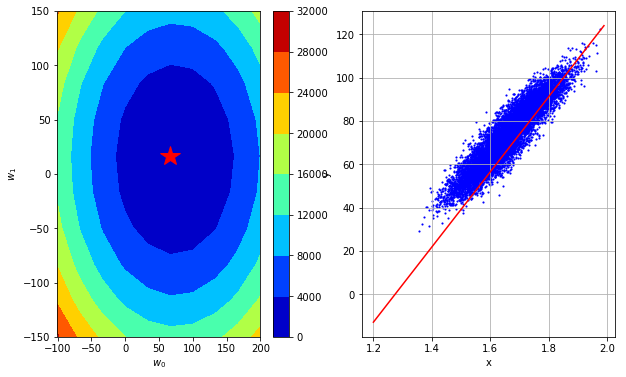

In [20]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [42]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    N, _ = np.shape(tx)
    loss = compute_loss(y, tx, w)
    gradient0 = -np.sum(y - np.matmul(tx, w)) / N
    print(tx[:,1])
    gradient1 = -np.sum(np.multiply(y - np.matmul(tx, w), tx[:,1])) / N
    return gradient0, gradient1, loss

Please fill in the functions `gradient_descent` below:

In [43]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        g0, g1, loss = compute_gradient(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * np.asarray([g0, g1])
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [44]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147362, w1=9.435798704492278
[ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
Gradient Descent(1/49): loss=265.30246210896024, w0=66.69746902191572, w1=12.26653831584
[ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
Gradient Descent(2/49): loss=37.878379550441174, w0=71.31498610804834, w1=13.11576019924433
[ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
Gradient Descent(3/49): loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
[ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
[ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
Gradient Descent(5/49): loss=15.402284895265295, w0=73.2404907329656

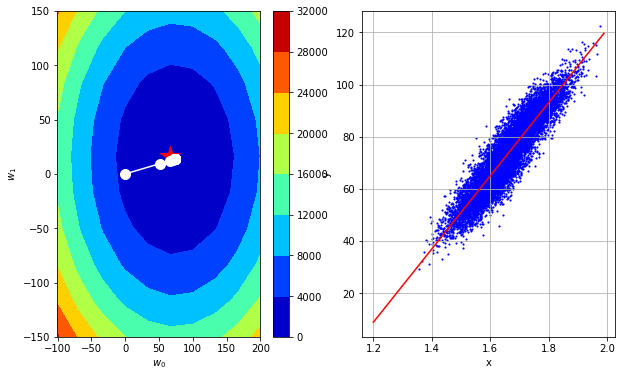

In [45]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [50]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = []
    losses = []
    w = initial_w
    for y_stoc, x_stoc in batch_iter(y, tx, batch_size, max_iters, True):
        g0, g1, loss = compute_stoch_gradient(y_stoc, x_stoc, w)
        w = w - gamma * np.asarray([g0, g1])
        ws.append(w)
        losses.append(loss)
#         print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
#               bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
        
    return losses, ws

In [53]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[-0.47080576 -1.40047561 -0.95971648  0.02747897 -0.65225711 -0.30821031
  0.04177083  1.48149801  0.3187846  -0.20117734]
[ 0.69543872 -0.13176159 -1.82300928 -0.03473981 -0.64461351 -0.48995101
 -0.61038684 -0.32526086 -0.08002902 -0.32321531]
[ 0.79943515  0.17839792 -1.33617949 -2.12625548 -1.08710984  1.17845214
  0.45746389 -0.65418813  0.68637101  0.5359066 ]
[-0.21502081 -1.11795639 -2.07111804  0.61728374  0.1319883  -1.28334191
 -0.20313566 -0.43012987  0.27511408 -0.18622504]
[-1.79859584  1.10704998 -0.81882153 -1.87155901 -2.23602837 -1.0938968
 -1.09433012  0.82841799 -0.14581593  0.04502586]
[-1.53585433  0.69571546 -0.50405557 -0.4161305   1.48660585  0.7637827
 -1.1550031   0.2761117  -1.83374319 -1.47838315]
[ 0.16382823 -1.14127643  0.83398275  1.15129522  0.8804208   2.50193932
 -1.08098338  0.7282263  -0.793833    0.65745742]
[ 0.09528962 -0.47220183 -0.62117149 -1.22360987 -0.32491962 -0.85073847
  1.98066799  0.07198917  1.396997   -2.66734979]
[-0.47979954 -0.25

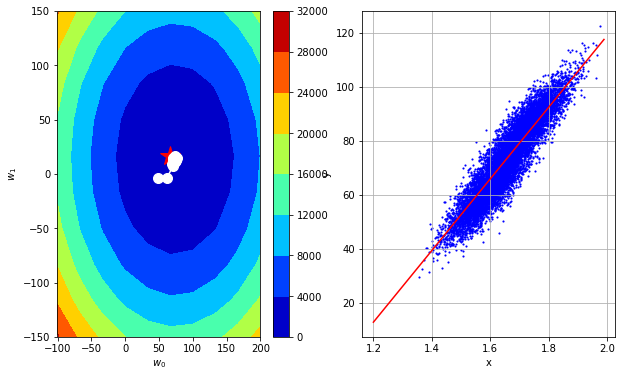

In [54]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [60]:
h, w, g = load_data(sub_sample=True, add_outlier=True)
x_new, mean_x_new, std_x_new = standardize(h)
y_new, tx_new = build_model_data(x_new, w)

In [61]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y_new, tx_new, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[ 1.60732851 -0.34425702  0.79029417  0.23636113  1.03574313  0.28919556
  0.74882936 -0.04632715  0.77279579  0.70803751  1.22317436 -0.57065396
  0.84616852  1.44668334  0.72740835  0.89069732  1.25596045  1.00133428
  1.68686386  0.03767522  0.00918269  0.87570357  0.88055278  1.20170024
 -0.36490269  0.93150985  0.37926243  1.54839342  0.64311392  0.34901818
  0.3273167   0.21841965  0.12646788  0.28394409  1.13595675  1.77045186
  0.92306748  1.29310729  0.39732424 -0.88448736  0.61073869  0.0218681
  0.05326759  1.04566371  1.25675733  0.88447628 -0.56568035 -0.31036715
  0.75671568  1.51130758 -1.14261533  1.06569379  0.25478874  1.19048226
  1.44634048  1.3527318   1.50914462  0.90166477 -0.48051851  0.49709578
  0.30166342  0.60505893  0.66654589  0.28049228  0.75436545  0.35656923
 -0.03423691  0.41213895  1.02594761  1.95052779  1.36876442  1.669044
 -0.61475941  1.25606852 -0.18144921  0.90324918  1.70676977  0.87702059
  0.918471    1.72288041  0.49101803  0.20475799  0.16

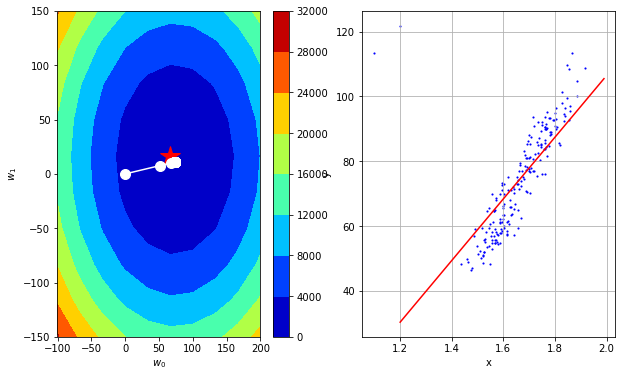

In [62]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x_new, std_x_new, h, w, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)